# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [3]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smartcab doesn't move at all during each simulation trial. It simply always takes an action of 'idle' whatever the traffic light is. There are two kinds of rewards, positive and negative rewards. The driving agent receives a positive reward when it idles at a red light and receives a negative reward when it idles at a green light with no oncoming traffic.

Besides, the Smartcab gets a positive reward when it's not allowed to trun right or left:

forbidden to turn left in a situation where there is a oncoming traffic making a right turn or coming straight through the intersection on a green light
forbidden to turn right if a oncoming traffic is approaching from left side through the intersection. 
But this two situation do not explicitly show on the scree or terminal since we do not know the route of this Smartcab.
Since the Smartcab keeps idle and always stays where it at the beginning, the light changing only affect the rewards in the following way.

if the light is green, the Smartcab will always receive a negative reward due to its forbidden idling. The value of reward changes according to different situations of the intersection. The value of negative reward varies from -6 to -4.
if the light is red, the Smartcab then will get a positive reward since it doesn't try to move or take any kind of action. The value of positive reward varies from 1 to ~2.9. 
It seems that the situation of the intersection will also affect the values of rewards.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- In the *`agent.py`* Python file, there are many flags. I choose the three flags which are much more directly relevant to the driving agent itself:

**learning:** this is a boolean flag. The default setting is 'False', which corresponds to random-action chooser. Setting this flag to be 'True' will force the driving agent to use Q-learning. so that the agent will act according to the result of Q-learning. The other two flags work and affect the choice of action only when this 'learning' flag is set to be 'True'.

**epsilon:** it is the factor of random exploration, default is 1. This flag determines the ability of exploration. Basically, its value varies from 0 to 1. We can simply think it as a probability of making a random choice of actions instead of using action chooser of Q-learning. Higher the epsilon is, the Smartcab tends to take risks of exploring new strategies. It will also learn slowly or even just keep taking a random action for a long time. Conversely, if the epsilon is too low, the Smartcab will have very limited ability of exploration to discover new behavior. It will keep learning what it already know and won't try to take any risk. Furthermore, by glancing at the content of this Python file, it seems that the value of epsilon will be updated/changed according to some decay function.

**alpha:** This flag is the learning factor, default is 0.5. This is an important factor for our Q-learning. It defined how much the learning experience will affect us after each step/iteration. Its value varies from 0 to 1. A 0 value of alpha means we don't take any learning experience so the agent will never learn new things. If the value of alpha is equal to 1, our agent then will always fully believe what it learns and make decision w/o taking any past experience into account. That is, it can't remember anything past but only the latest learned thing. A value of alpha between 0 and 1 means our agent will try to get a balance between learning new skills and sticking to old ways. Just like epsilon, the value of alpha will be updated/changed according to some decay function in this Python file.

- In the *`environment.py`* Python file, the class function 'act()' will be called when an agent performs an action. It will consider an action and perform the action if it is legal. The corresponding reward will also be returned by this class function.

- In the *`simulator.py`* Python file, the 'render_text()' function will only display the data of simulated trial in the terminal/command prompt while the 'render()' function will display supplementary information of each trial on the GUI of the game.

- In the *`planner.py`* Python file, the 'next_waypoint()' function considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


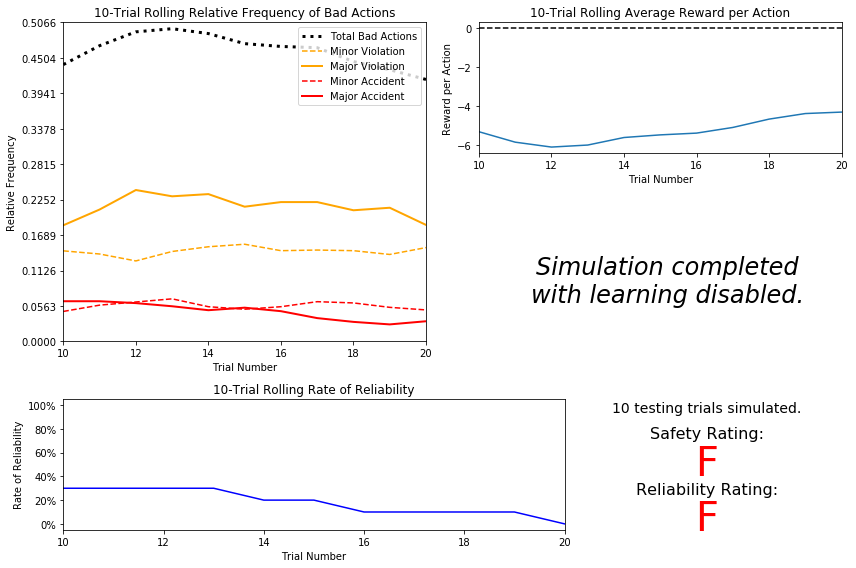

In [17]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

1. The driving agent is making bad decisions around 45% of the time. Furthermore, about 10% of those bad decisions cause accidents (minor accident and major accident).
2. It does make sense that the rate of reliability is only about 10%. The range of the rate of reliability among all trials is from 0% to 30%. Since now we are randomly picking one action from four possible candidates, we can have at most 25% chance of success without taking other factors into account. The final rate of reliability of a randomly-driving agent will be much lower than 25% if we consider the influences of different traffic conditions at the intersection. So it's quite reasonable that we can only have around 10% the rate of reliability.
3. From the upper right panel, it's quite obvious that the average rewards of actions of our agent are negative all the time in each trial. This means it has been penalized heavily for its bad moves.
4. The outcome of results do not make any significant difference as the number of trials increases. It seems our agent hasn't started learning anything or maybe it does learn something but just needs much more trials.
5. This Smartcab is definitely unsafe and unreliable. It makes more than 45% bad actions and even there are 10% of those bad bad decisions cause accidents. Also it also makes lots of violations. It usually falls to reach the destination in time (90%). It just keeps randomly driving and learn nothing from each trial. It's definitely at least not that 'Smart'.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

**Safety**

From my point of view, most of the sensory data are relevant to the 'safety' concern.

- 'light': this feature should be the most relevant for learning safety. The light will directly affect how many actions the agent can choose. If the light is red, the agent definitely can not choose moving forward. It can at most choose the turn right by taking other features like 'left' into account. 

And the features 'left' and 'oncoming' are also very important for learning safety but is not that critical as 'light'.

- 'left': This feature is important when the agent chooses to turn right on a red light. A right turn on a red light is only permitted if no oncoming traffic is approaching from your left through the intersection.
- 'oncoming': This feature is related to turning left on a green light. A left turn on a green light is only permitted if there is no oncoming traffic making a right turn or coming straight through the intersection.

By following U.S. Right-of-Way rules, we can know that the feature 'right' play no role in any actions if the agent can only choose None, (do nothing) 'left' (turn left), right' (turn right), or 'forward' (go forward).

**Efficiency**

The feature 'waypoint' is much more relevant for learning efficiency. If our agent don't plan a proper route according to the feature 'waypoint' but just randomly drive, it definitely can't be a efficient cab. The 'deadline' is less relevant to efficiency although I think it can still play a part in learning efficiency. Our agent can always takes a long but safe route to our destination without any efficiency concern. But I think the feature 'waypoint' can already provide enough information of how to learning efficiency. That is, our cab agent try to makes a action decision which follows the direction of waypoint as possible as it can.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The number of value of each feature I have chosen is listed below:

- light: 2 ('red', 'green')
- left: 4 (None, 'left', 'right', 'forward')
- oncoming: 4 (None, 'left', 'right', 'forward')
- waypoint: 3 ('left', 'right', 'forward')
- action: 4 ('None', 'left', 'right', 'forward')


The 4 actions of out Smartcab can't include the acttions since it is not in my state function. Therefore, the tatal state space are 2x4x4x3 = 96 states. By using the Monte Carlo simulation, we found the chance of visiting all 96 states in 1500 steps could attain to 1.0. If our steps are 750, the chance of visiting all states is 0.96, and it's also high value. If we want to attain to 750 steps training for the 96 steps. I think we could train by 75 trails, beacause each trail will request around 10 times actions. As a results, the total iterations could attain to 75x10 =750 iterations. Although in our training, we use 980 training trails that is enough to train these states.

In [49]:
from sets import Set
from random import choice

def chance_of_visiting_all_states(iterations, k, n=24):
    r = range(n)
    total = 0
    for i in range(iterations):
        s = Set()
        for j in range(k):
            s.add(choice(r))
            if len(s) == n:
                total +=1
                break
    return float(total)/iterations

steps = 750
print "Chance of visiting all states in {st} steps: {ch}".format(st = steps, ch = chance_of_visiting_all_states(2000, steps, 96))

Chance of visiting all states in 750 steps: 0.96


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

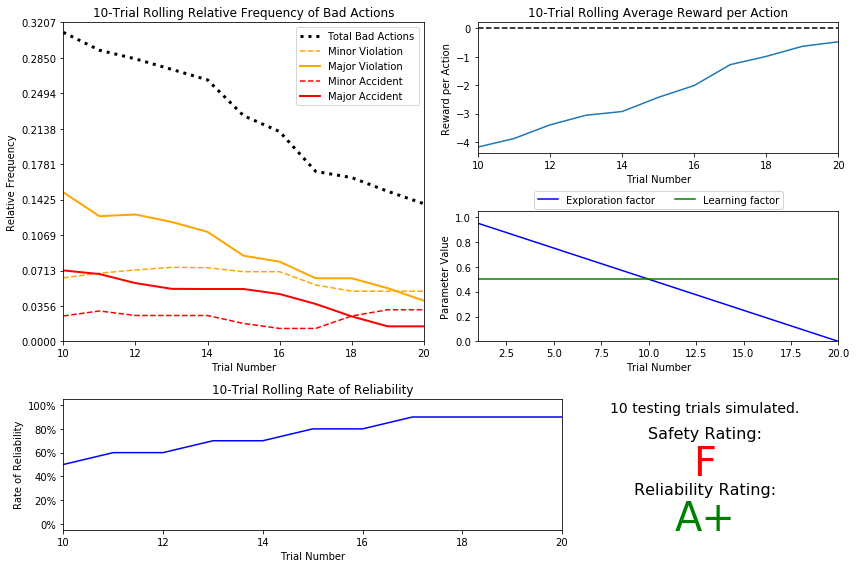

In [56]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

1.The safety rating of the default Q-Learning agent is D, which is still quite low and just the same as the basic driving agent.
The decay function of epsilon $\epsilon$ is $\epsilon_{t+1} = \epsilon_{t} - 0.05$ for trial number t. 

2.The default epsilon-tolerance is 0.05. Once the epsilon is smaller than epsilon-tolerance, the testing will be started. We can then know the agent requires about 20 training trials before testing. The epsilon will be equal to 0, which is smaller than 0.05, at the 20th training trial. This number makes sense given the epsilon-tolerance and is consistent with the number of training trials of our actual execution.

3.The decaying function I implemented for $\epsilon$ is accurately represented in the parameters panel. It linearly decreased by 0.05 in each trail and becomes 0 at the 20th trial.

4.Two things are also quite obvious in the last 10 training trails. The number of bad actions did decrease and also the average reward increased as the number of training trails increased. The rate of bad actions dropped from ~30% to ~11% while the average reward also had an impressive improvement from ~-3 to ~-0.5.

5.As I have mentioned before, the safety rating of the default Q-Learning agent is the same as initial driving agent. It's still F. Although we can say that we have made some progress on the rate of bad actions, our agent have already learned something so that it make not that bad decisions of choosing actions. But it's not enough since we are highly requiring our cab agent being a safe driver. I think we still have to work hard on this safety issue. For the reliability concern, we receive a A+ rating now. .Originally, the initial agent has about 10% average reliability in its training trials. Now we can find that the reliability of our last training trial is up to ~80%.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

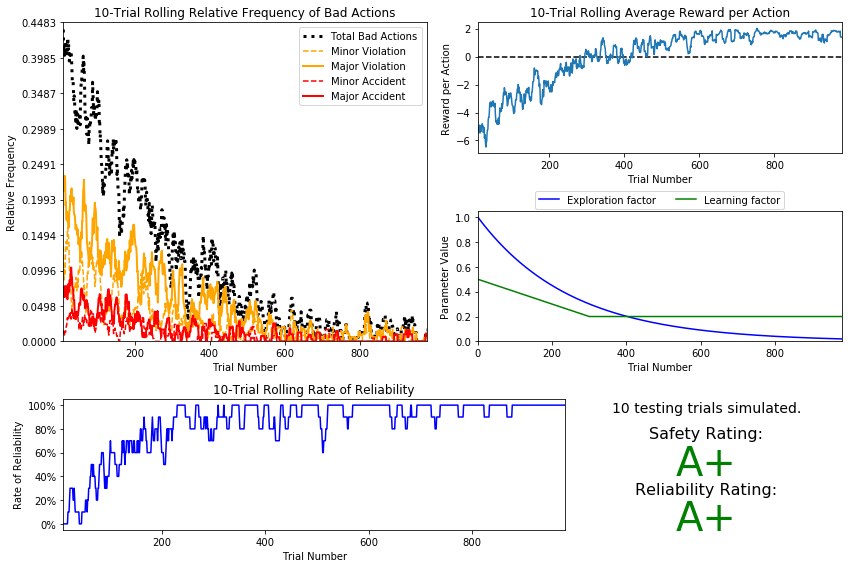

In [52]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

1.The decaying function I used for epsilon is $\epsilon = e^{-0.004t}$ for trial number t.

2.According to the epsilon-tolerance I set, 0.02, I would need approximately 980 training trails for the agent before beginning testing.

3.The epsilon-tolerance was 0.02 and the alpha was also a fixed value 0.5. I simply chose these values based on the performance, safety and reliability rating, of the cab agent. I tuned the value of these two parameters so that the agent could have high/acceptable safety and reliability rating. The apsilon-tolerance was the parameter correlated to how much training trials the agent could experiences. I decreased its value in order to have more training trials.

4.For the learning rate $\alpha$, it could be useful to improve our relibility rating, as a result we could fonud our learning rate is decreasing from 0.5 to 0.2 and keeps 0.2 to the end. The case with constant learning rate is shown behind. The learning rate $\alpha$ equal to 0 means the Q-learning never learing news but only keep the past experience, in the other side, the learning rate $\alpha$ equal to 1 means Q-learning learning each times that can't learn some thing. Therefore, we choose the default 0.5 is the initial condition, following the decreasing value 0.001. Therefore, we can observe the realiaility is  better in the trail range of 200 to 400 for the decay learning rate case, because the Q-learning could keep it good experience, the constant learning rate case can't.

5.It was obvious that we made significant improvement with this optimized Q-Learner. The safety rating of the default Q-Learner was 'F' while the optimized Q-Learner got 'A+'. The realibility rating of the default Q-Learne was 'A+' while the optimized Q-Learner got 'A+'.

6.I would say my driving agent had successfully learned an appropriate policy. From the upper line chart of reward per action, we could find the average reward was always positive and steady after having 800 training trials. The testing result also showed us the same conclusion. Our agent did learn an appropriate policy to act correctly in any (or most of) situation(s).

7.I am satisfied with the safety and reliability ratings of the Smartcab. It works quite well beyond my imagination!



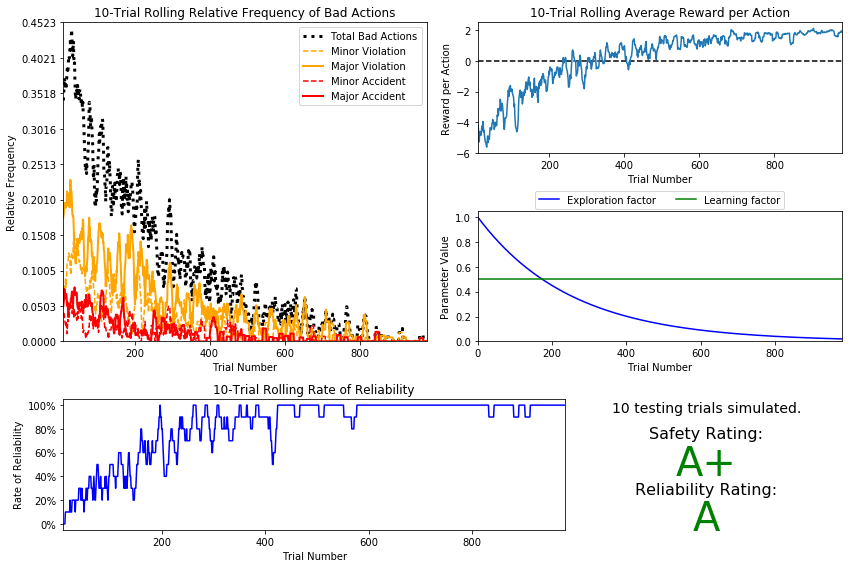

In [55]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation with ** fix learning rate alpha **
vs.plot_trials('sim_improved-learning.csv')

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1. Here is the optimal policy I think the Smartcab agent should learn:<br>
  - if the waypoint is 'forward'
     - if the light is 'green', take a 'forward' action
     - otherwise take a 'None' action
  - if the waypoint is 'right'
     - if there is oncoming traffic approaching from left through the intersection (left: 'forward'), take a 'None' action
     - otherwise take a 'right' action
  - if the waypoint is 'left'
     - if the light is 'green'
         - if there is no oncoming traffic or there is oncoming traffic (oncoming: 'None') making a left turn (oncoming: 'left'), take a 'left' action
         - otherwise, take a 'forward' action.
     - otherwise, take a 'None' action
2. Basically, the policy is correct, which is consistent with the optimal policy I expected, for most of the given states. There are sill few states where the policy is different than what would be expected from an optimal policy. 
3. **Example 1**:
    ('left', 'green', 'forward', 'left')<br>
    -- forward : 1.02<br>
    -- None : -5.15<br>
    -- right : 0.90<br>
    -- left : 1.77<br>
    The Smartcab's waypoint was 'left'. The light was 'green'. The intended direction of travel for a vehicle across the intersection from the Smartcab was 'left'. Our Smartcab should take a 'left' action according to the optimal policy. We could also find that the Q-value of 'None' was the lowest one in such situation in order not to violate the traffic rules.

    **Example 2**:
    ('right', 'red', 'forward', 'forward')<br>
    -- forward : -35.24<br>
    -- None : 1.11<br>
    -- right : -18.25<br>
    -- left : -29.38<br>
    The Smartcab's waypoint was 'right'. The light was 'red'. The intended direction of travel for a vehicle to the Smartcab's left was 'forward'. Our Smartcab should take a 'None' action according to the optimal policy. We could also find that the Q-value of 'forward', 'right' and 'left' were extremely low than 'None'. These three actions were very bad choices which might cause serious accidents.
    
    **Example 3**:
    ('forward', 'green', 'forward', 'forward')<br>
    -- forward : 1.83<br>
    -- None : -3.99<br>
    -- right : 0.44<br>
    -- left : -14.76<br>
    The Smartcab's waypoint was 'forward'. The light was 'green'. The intended direction of travel for a vehicle across the intersection from the Smartcab was 'forward'. Our Smartcab should take a 'forward' action according to the optimal policy. We could also find that the Q-value of 'left' was the lowest one and also terribly lower than the values of the other actions. This told us that this 'left' action was potentially dangerous for traffic accidents due to there was an oncoming vehicle moving forward. Besides, the 'None' action also got a negative value in this situation for the violation of the traffic rules.

4. The following are all entyies where the Smartcab didn't learn the optimal policy. <br>
    - ('left', 'green', 'left', 'forward')<br>
        -- forward : -0.35<br>
        -- None : 0.00<br>
        -- right : 0.99<br>
        -- left : -17.03<br>
        In this state, I expected the agent should take a 'forward' action. But we could find that the action 'right' got the highest value. This was not consistent to the optimal policy. It was not reasonable to take an action which is oppositive to the direction of the waypoint.    
    - ('right', 'red', 'left', 'right')<br>
        -- forward : 0.00<br>
        -- None : 0.49<br>
        -- right : 0.00<br>
        -- left : -29.78<br>
        It should take a 'right' action instead of a 'None' action
    - ('left', 'green', None, 'forward')<br>
        -- forward : 0.25<br>
        -- None : -4.69<br>
        -- right : 0.87<br>
        -- left : -19.87<br>
        It should take a 'forward' action instead of a 'right' action.
    - ('left', 'green', None, 'right')<br>
        -- forward : -0.24<br>
        -- None : -5.11<br>
        -- right : 1.33<br>
        -- left : -14.95<br>
        It should take a 'forward' action instead of a 'right' action.
        
    It seemed that our Smartcab learned some sub-optimal policies. One thing we could feel good was that our Smartcab did learn something: it knew that the most incorrect action in the above four entries. For example, in the above first entry, ('left', 'green', 'left', 'forward'), it definitely should NOT take a 'left' action because such action would probably cause an accident with the oncoming traffic. And instead of taking the most correct action in each entry, our cab chose an action which didn't break the traffic rule or cause any accident. That was why I said our cab only learned sub-optimal policies in these entries. There were lots of reasons why our Smartcab didn't learn the optimal policy:
        - There were not enough training trails for our cab to learn how to optimally act in these entries.
        - There were still rooms for improving the setting of epsilon and learning rate.
        - At some learning trials, the reward of arriving the destination forced our cab to learn sub-optimal policy. 


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

**For the Smartcab** The positions of starting and destination changes with every training trials. This will somehow invalidate the use of future rewards in our current Q-Learning algorithm. As already mentioned before, including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Different combination of starting and destination points would make our training to extract different information from the future rewards. The experience between different training trails can't be used properly because of the low relevance of different training trials. So the policies of arriving a very far destination should be quite different distribution of Q-values to those of short rides. And this problem may become very serious when the number of training trails increases. The learning experiences of different trial-specific start to affect each other by passing improper future rewards.

**For the environment** Our environment doesn't give us the information of absolute position in a coordinate system. Actually, this characteristic of environment is correlated with the characteristic of Smartcab mention in the last paragraph. There are several combinations of different starting and destination positions. Each of them of have its own optimal policy for taking actions and planning route. Our Smartcab should have different learning experiences in the same position among different training trials. But the truth is our cab only learn how to act according to its waypoint but not where it really is. It's then very difficult for it to learn something properly from the future rewards. All it has are more correlated to its current state. It can't learn anything more than one step far from the current state.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.